In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
# 런타임 재시작 없이 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [4]:
# 설치된 나눔 폰트 경로 찾기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)  # 폰트 등록
plt.rc('font', family='NanumGothic')  # 기본 폰트 설정

In [5]:
!pip install dask[dataframe]

1. 파일 업로드 및 라이브러리 임포트

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/sample_submission.csv')

In [7]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


2. EDA

In [8]:
train.head(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [10]:
# 전처리
# 결측치 처리 (중앙값으로 대체)
cols_to_fill = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
for col in cols_to_fill:
    train[col].fillna(train[col].median(), inplace=True)

<ipython-input-10-fa9eb8c13e47>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [ ]:
col_to_count = ['매물확인방식', '방향', '중개사무소', '제공플랫폼']
for col in col_to_count:
  print(train[col].value_counts())

매물확인방식
현장확인    1705
전화확인     382
서류확인     365
Name: count, dtype: int64
방향
남향     610
동향     605
서향     389
남동향    275
남서향    220
북향     198
북서향     80
북동향     75
Name: count, dtype: int64
중개사무소
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: count, Length: 279, dtype: int64
제공플랫폼
A플랫폼    958
B플랫폼    610
C플랫폼    350
D플랫폼    184
E플랫폼    142
F플랫폼     63
G플랫폼     59
H플랫폼     34
I플랫폼     20
J플랫폼     12
L플랫폼     10
K플랫폼      8
M플랫폼      2
Name: count, dtype: int64


In [ ]:
# 전처리
# IQR을 활용한 이상치 제거
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
for col in ['보증금', '월세', '전용면적']:
    train = remove_outliers(train, col)

In [11]:
# 범주형 데이터 변환 (Target Encoding)
# Target Encoding (중개사무소, 제공플랫폼, 방향, 주차가능여부, 매물확인방식)
target_encoding_cols = ['중개사무소', '제공플랫폼', '방향', '주차가능여부', '매물확인방식']
target_encoding_map = {}  # Target Encoding 매핑 저장할 딕셔너리 추가

for col in target_encoding_cols:
    if col in train.columns:
        # train 데이터에서 타겟 인코딩
        mean_encoded = train.groupby(col)['허위매물여부'].mean()
        target_encoding_map[col] = mean_encoded.copy()
        train[col + '_enc'] = train[col].map(mean_encoded)

        # test 데이터에 타겟 인코딩 적용 (없는 값은 평균값으로 대체)
        if col in test.columns:
            test[col + '_enc'] = test[col].map(target_encoding_map[col]).fillna(target_encoding_map[col].mean())

    # 원본 컬럼 삭제
    train.drop(col, axis=1, inplace=True)
    if col in test.columns:
        test.drop(col, axis=1, inplace=True)

# 새로운 피처 추가
train['보증금_월세비율'] = train['보증금'] / (train['월세'] + 1)  # 0 나눔 방지
train['전용면적_log'] = np.log1p(train['전용면적'])
train['층비율'] = train['해당층'] / train['총층']

# 날짜 처리 (연도 차이 & 분기 정보 추가)
train['게재일'] = pd.to_datetime(train['게재일'])
train['경과일'] = (pd.to_datetime('2025-02-25') - train['게재일']).dt.days
train['게재_분기'] = train['게재일'].dt.quarter  # 계절성 반영
train['게재_연도차이'] = 2025 - train['게재일'].dt.year  # 연도 차이 계산
train.drop(['게재일'], axis=1, inplace=True)

# 로그 변환
train['보증금_log'] = np.log1p(train['보증금'])
train['월세_log'] = np.log1p(train['월세'])

# 플랫폼별 매물 수 비율 추가
platform_counts = train['제공플랫폼_enc'].value_counts(normalize=True)
train['제공플랫폼_비율'] = train['제공플랫폼_enc'].map(platform_counts)

# 최종 컬럼 선택
train.drop(['보증금', '월세', '전용면적', '해당층', '총층'], axis=1, inplace=True)

# 확인
print(train.head())

           ID   방수  욕실수  총주차대수  관리비  허위매물여부  중개사무소_enc  제공플랫폼_enc    방향_enc  \
0  TRAIN_0000  1.0  1.0   40.0   96       0   0.333333   0.104918  0.203085   
1  TRAIN_0001  2.0  1.0   10.0    0       0   0.000000   0.201087  0.098182   
2  TRAIN_0002  1.0  1.0   10.0    0       0   0.052632   0.125261  0.087603   
3  TRAIN_0003  2.0  1.0   13.0   10       0   0.000000   0.125261  0.098182   
4  TRAIN_0004  2.0  1.0   10.0    0       1   0.052632   0.104918  0.087603   

   주차가능여부_enc  매물확인방식_enc     보증금_월세비율  전용면적_log       층비율  경과일  게재_분기  \
0    0.080841    0.131378   856.381157  3.310543  0.266667  139      4   
1    0.162963    0.131378   852.495738  3.310543  0.750000   61      4   
2    0.162963    0.094241   299.999211  3.310543  0.666667   89      4   
3    0.080841    0.131378  5449.818339  3.618993  0.333333   91      4   
4    0.162963    0.131378   652.828957  3.310543  1.000000  245      2   

   게재_연도차이    보증금_log     월세_log  제공플랫폼_비율  
0        1  19.813206  13.060490  0

In [12]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


In [13]:
train.head()

,ID,방수,욕실수,총주차대수,관리비,허위매물여부,중개사무소_enc,제공플랫폼_enc,방향_enc,주차가능여부_enc,매물확인방식_enc,보증금_월세비율,전용면적_log,층비율,경과일,게재_분기,게재_연도차이,보증금_log,월세_log,제공플랫폼_비율
0,TRAIN_0000,1.0,1.0,40.0,96,0,0.333333,0.104918,0.203085,0.080841,0.131378,856.381157,3.310543,0.266667,139,4,1,19.813206,13.060490,0.248777
1,TRAIN_0001,2.0,1.0,10.0,0,0,0.000000,0.201087,0.098182,0.162963,0.131378,852.495738,3.310543,0.750000,61,4,1,18.954246,12.206078,0.075041
2,TRAIN_0002,1.0,1.0,10.0,0,0,0.052632,0.125261,0.087603,0.162963,0.094241,299.999211,3.310543,0.666667,89,4,1,18.551709,12.847929,0.390701
3,TRAIN_0003,2.0,1.0,13.0,10,0,0.000000,0.125261,0.098182,0.080841,0.131378,5449.818339,3.618993,0.333333,91,4,1,18.912324,10.308986,0.390701
4,TRAIN_0004,2.0,1.0,10.0,0,1,0.052632,0.104918,0.087603,0.162963,0.131378,652.828957,3.310543,1.000000,245,2,1,19.661949,13.180634,0.248777


In [ ]:
# 컬럼명 확인
print(train.columns)

Index(['ID', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc',
       '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '보증금_월세비율', '전용면적_log', '층비율',
       '경과일', '게재_분기', '게재_연도차이', '보증금_log', '월세_log', '제공플랫폼_비율'],
      dtype='object')


In [ ]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['ID', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '보증금_월세비율', '전용면적_log', '층비율', '경과일', '게재_분기', '게재_연도차이', '보증금_log', '월세_log', '제공플랫폼_비율']


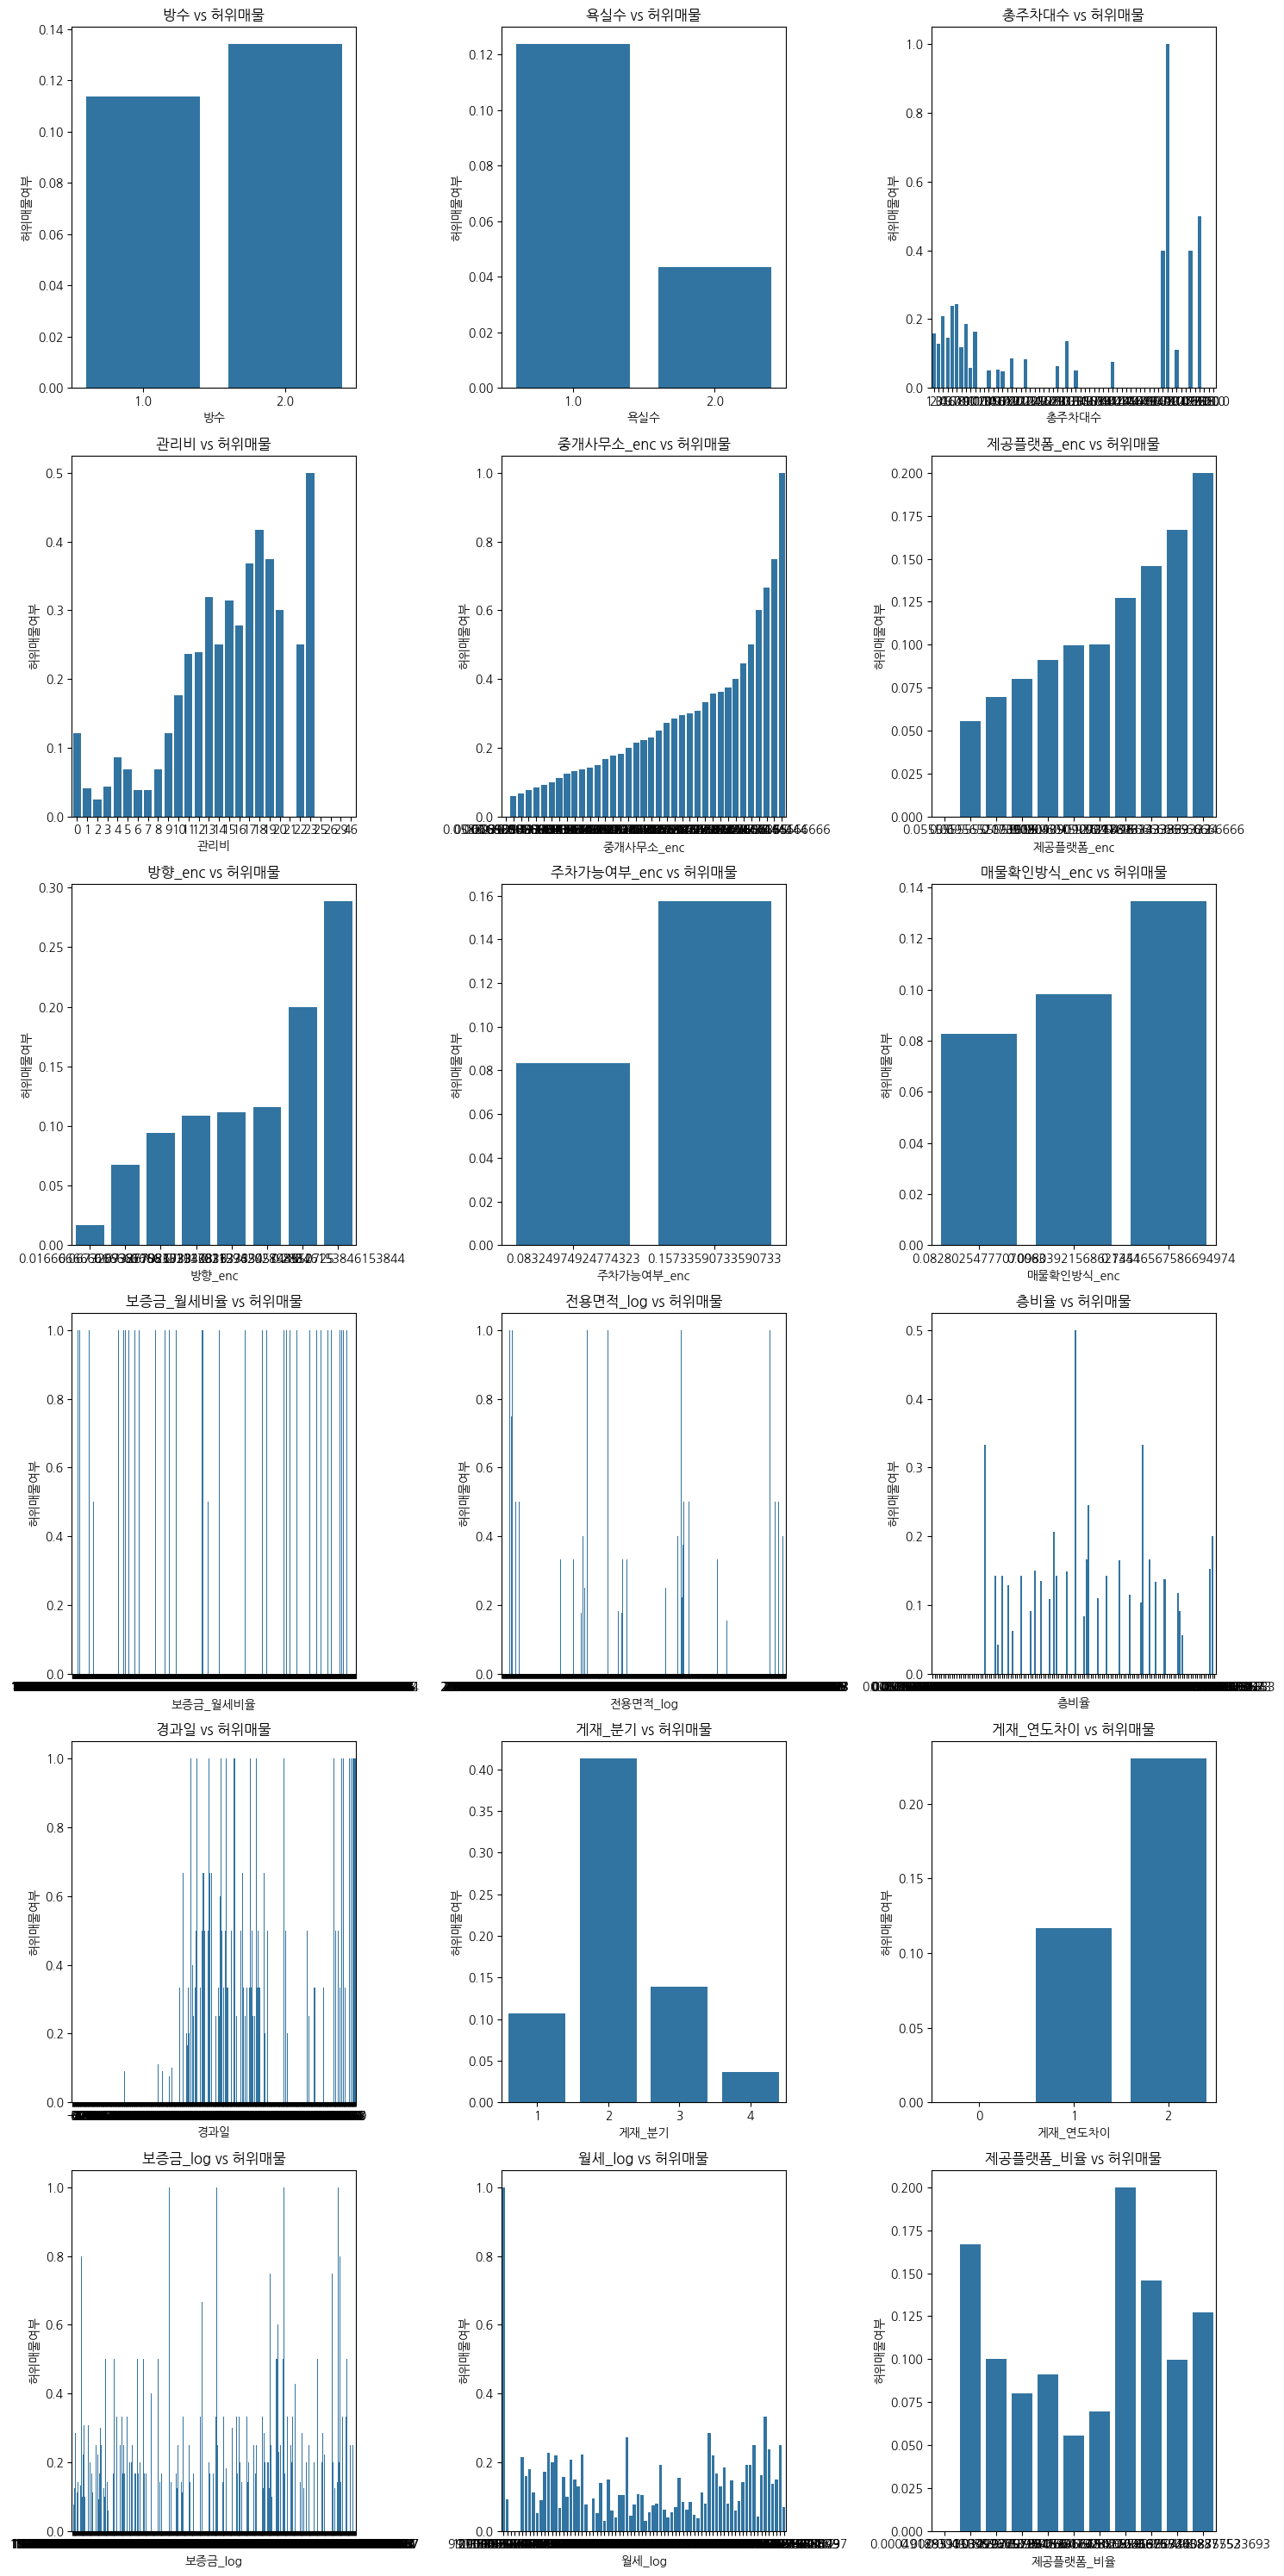

In [ ]:
import math
categorical_cols = ['방수', '욕실수', '총주차대수', '관리비', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '보증금_월세비율', '전용면적_log', '층비율', '경과일', '게재_분기', '게재_연도차이', '보증금_log', '월세_log', '제공플랫폼_비율']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.barplot(x=train[col], y=train['허위매물여부'], errorbar=None)  # `ci=None` 대신 `errorbar=None`
    plt.title(f"{col} vs 허위매물")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

<ipython-input-18-e122bdffa84d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-18-e122bdffa84d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-18-e122bdffa84d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-18-e122bdffa84d>:12: FutureWarning: 

Passing `palette` without assigning

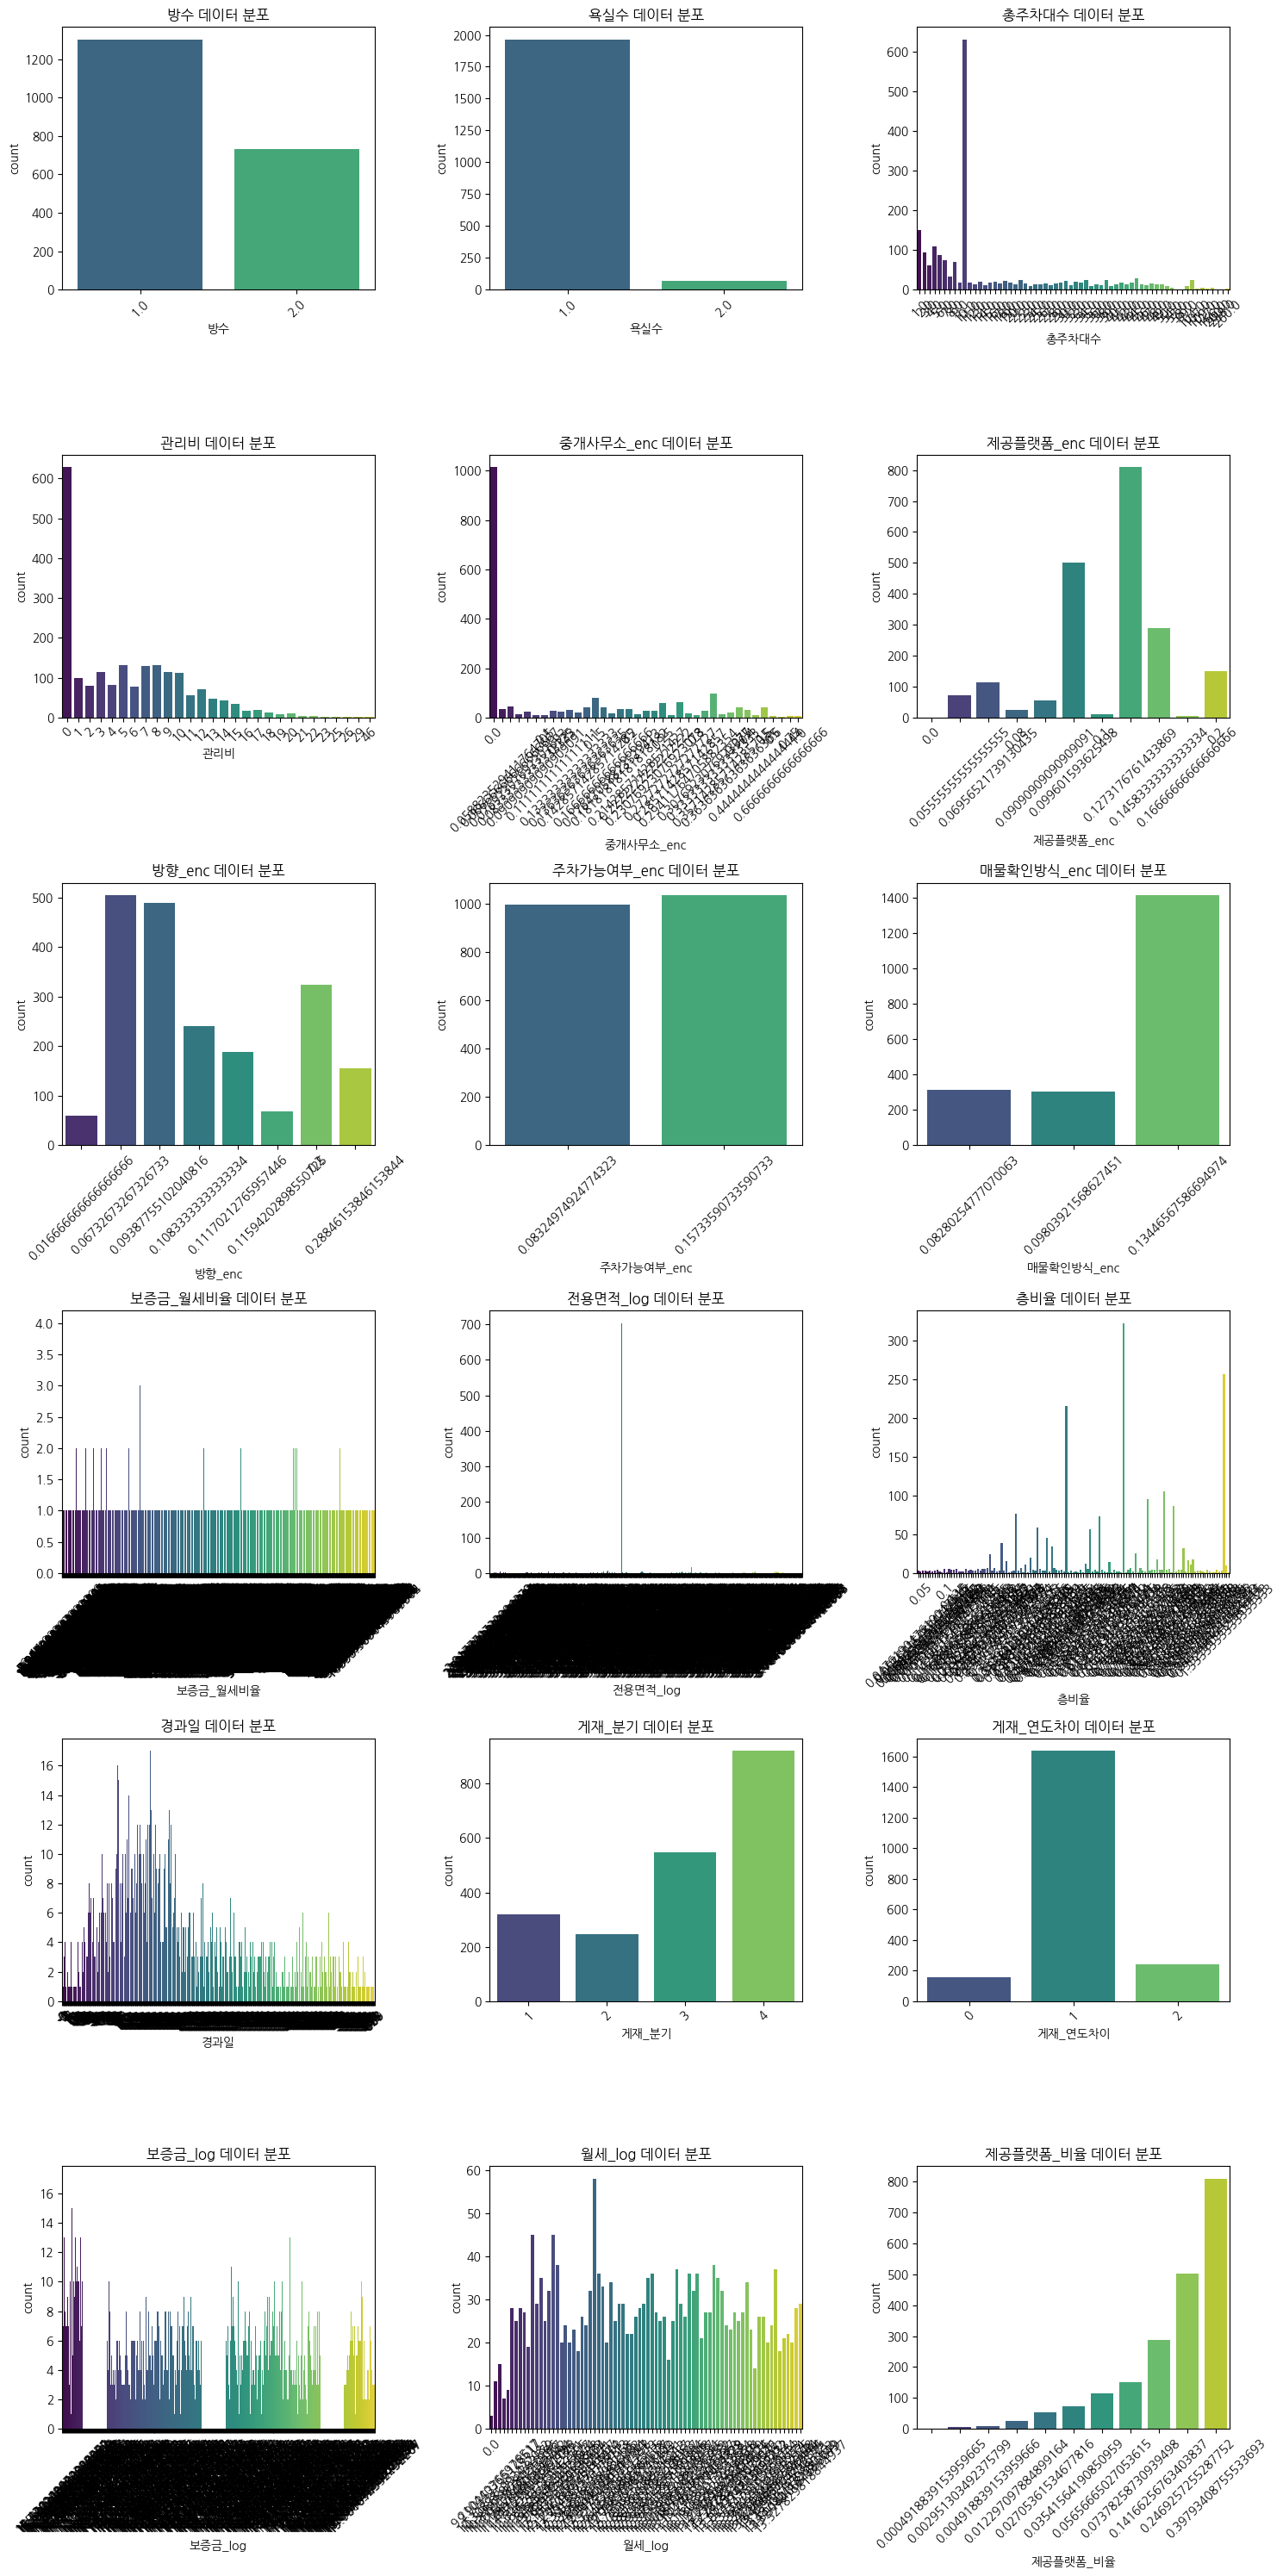

In [ ]:
# 시각화할 범주형 변수 리스트
categorical_cols = ['방수', '욕실수', '총주차대수', '관리비', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '보증금_월세비율', '전용면적_log', '층비율', '경과일', '게재_분기', '게재_연도차이', '보증금_log', '월세_log', '제공플랫폼_비율']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
    plt.xticks(rotation=45)  # X축 라벨 회전
    plt.title(f"{col} 데이터 분포")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [ ]:
for col in categorical_cols:
    print(train.groupby(col)['허위매물여부'].mean().sort_values(ascending=False))
    print("="*50)

방수
2.0    0.134063
1.0    0.113671
Name: 허위매물여부, dtype: float64
욕실수
1.0    0.123727
2.0    0.043478
Name: 허위매물여부, dtype: float64
총주차대수
57.0     1.000000
166.0    0.500000
54.0     0.400000
109.0    0.400000
6.0      0.243243
           ...   
37.0     0.000000
38.0     0.000000
39.0     0.000000
17.0     0.000000
260.0    0.000000
Name: 허위매물여부, Length: 62, dtype: float64
관리비
23    0.500000
18    0.416667
19    0.375000
17    0.368421
13    0.319149
15    0.314286
20    0.300000
16    0.277778
14    0.250000
22    0.250000
12    0.239437
11    0.236364
10    0.176991
9     0.121739
0     0.121019
4     0.086420
8     0.068702
5     0.068182
3     0.043478
1     0.040404
6     0.038961
7     0.038462
2     0.025000
21    0.000000
25    0.000000
26    0.000000
29    0.000000
46    0.000000
Name: 허위매물여부, dtype: float64
중개사무소_enc
1.000000    1.000000
0.750000    0.750000
0.666667    0.666667
0.600000    0.600000
0.500000    0.500000
0.444444    0.444444
0.400000    0.400000
0.375000    0.37

# **250228 메모**

- 관리비
- 게재_연도차이, 게재_분기 포함
- 제공플랫폼_enc 포함
- 방향_enc 포함
- 매물확인방식_enc 포함(없앤것과 차이점 봐야함)
- 중개사무소_enc 포함


- 보증금_log, 월세_log 제거
- 경과일 제거
- 전용면적_log, 층비율 제거
- 방실, 욕실수 제거
- 총 주차대수 제거
- 보증금_월세비율 제거
- 중개사무소 제거
- 주차가능여부 제거
- 제공플랫폼_비율 제거

# **test 데이터 처리**

In [14]:
test.head()

,ID,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,게재일,중개사무소_enc,제공플랫폼_enc,방향_enc,주차가능여부_enc,매물확인방식_enc
0,TEST_000,223000000.0,530000,NaN,5.0,5.0,1.0,1.0,NaN,7,2024-10-21,0.500000,0.201087,0.065574,0.162963,0.104110
1,TEST_001,150500000.0,590000,30.26,7.0,11.0,1.0,1.0,16.0,11,2023-09-02,0.000000,0.201087,0.203085,0.162963,0.104110
2,TEST_002,47000000.0,200000,41.50,2.0,3.0,2.0,1.0,NaN,0,2024-04-03,0.052632,0.104918,0.109091,0.162963,0.131378
3,TEST_003,133000000.0,250000,31.35,5.0,6.0,2.0,1.0,NaN,5,2024-09-19,0.000000,0.104918,0.065574,0.080841,0.104110
4,TEST_004,108000000.0,380000,23.14,2.0,3.0,1.0,1.0,NaN,0,2024-11-10,0.111111,0.125261,0.065574,0.162963,0.131378


In [12]:
# 전처리
# 결측치 처리 (중앙값으로 대체)
cols_to_fill_test = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
for col in cols_to_fill_test:
    test[col].fillna(test[col].median(), inplace=True)

<ipython-input-12-c4149eedb36d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].median(), inplace=True)


In [ ]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2033
Test data length: 613
Sample_submission data length: 613


In [13]:
# 새로운 피처 추가
test['보증금_월세비율'] = test['보증금'] / (test['월세'] + 1)  # 0 나눔 방지
test['전용면적_log'] = np.log1p(test['전용면적'])
test['층비율'] = test['해당층'] / test['총층']

# 날짜 처리 (연도 차이 & 분기 정보 추가)
test['게재일'] = pd.to_datetime(test['게재일'])
test['경과일'] = (pd.to_datetime('2025-02-25') - test['게재일']).dt.days
test['게재_분기'] = test['게재일'].dt.quarter  # 계절성 반영
test['게재_연도차이'] = 2025 - test['게재일'].dt.year  # 연도 차이 계산
test.drop(['게재일'], axis=1, inplace=True)

# 로그 변환
test['보증금_log'] = np.log1p(test['보증금'])
test['월세_log'] = np.log1p(test['월세'])

# 플랫폼별 매물 수 비율 추가 (train 기준 비율 적용)
test['제공플랫폼_비율'] = test['제공플랫폼_enc'].map(platform_counts).fillna(platform_counts.mean())  # 없는 값은 평균 대체

# 최종 컬럼 선택
test.drop(['보증금', '월세', '전용면적', '해당층', '총층'], axis=1, inplace=True)

# 확인
print(test.head())

         ID   방수  욕실수  총주차대수  관리비  중개사무소_enc  제공플랫폼_enc    방향_enc  주차가능여부_enc  \
0  TEST_000  1.0  1.0   11.5    7   0.500000   0.201087  0.065574    0.162963   
1  TEST_001  1.0  1.0   16.0   11   0.000000   0.201087  0.203085    0.162963   
2  TEST_002  2.0  1.0   11.5    0   0.052632   0.104918  0.109091    0.162963   
3  TEST_003  2.0  1.0   11.5    5   0.000000   0.104918  0.065574    0.080841   
4  TEST_004  1.0  1.0   11.5    0   0.111111   0.125261  0.065574    0.162963   

   매물확인방식_enc    보증금_월세비율  전용면적_log       층비율  경과일  게재_분기  게재_연도차이    보증금_log  \
0    0.104110  420.753923  3.340031  1.000000  127      4        1  19.222682   
1    0.104110  255.084313  3.442339  0.636364  542      3        2  18.829474   
2    0.131378  234.998825  3.749504  0.666667  328      2        1  17.665658   
3    0.104110  531.997872  3.476614  0.833333  159      3        1  18.705860   
4    0.131378  284.209778  3.183870  0.666667  107      4        1  18.497642   

      월세_log  제공플랫폼_비율  
0

In [17]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['ID', '방수', '욕실수', '총주차대수', '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_enc', '주차가능여부_enc', '매물확인방식_enc', '보증금_월세비율', '전용면적_log', '층비율', '경과일', '게재_분기', '게재_연도차이', '보증금_log', '월세_log', '제공플랫폼_비율']


In [14]:
keep_cols = ['관리비', '게재_연도차이', '게재_분기', '제공플랫폼_enc', '방향_enc', '중개사무소_enc', '허위매물여부']

train = train[keep_cols]

In [15]:
keep_cols_test = ['관리비', '게재_연도차이', '게재_분기', '제공플랫폼_enc', '방향_enc', '중개사무소_enc']

test = test[keep_cols_test]

In [21]:
print(len(test), len(sample_submission))

613 613


3. Modeling

In [16]:
# LightGBM & XGBoost
X = train.drop(columns=['허위매물여부'])
y = train['허위매물여부']

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
# RandomForest 모델
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print(f'RandomForest 평균 정확도: {np.mean(rf_scores):.4f}')

RandomForest 평균 정확도: 0.9494


In [19]:
# LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42)
lgb_scores = cross_val_score(lgb_model, X, y, cv=kf, scoring='accuracy')
print(f'LightGBM 평균 정확도: {np.mean(lgb_scores):.4f}')

[LightGBM] [Info] Number of positive: 235, number of negative: 1726
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 1961, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119837 -> initscore=-1.993976
[LightGBM] [Info] Start training from score -1.993976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [20]:
# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print(f'XGBoost 평균 정확도: {np.mean(xgb_scores):.4f}')

XGBoost 평균 정확도: 0.9462


In [21]:
# 피처 중요도 시각화
rf_model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

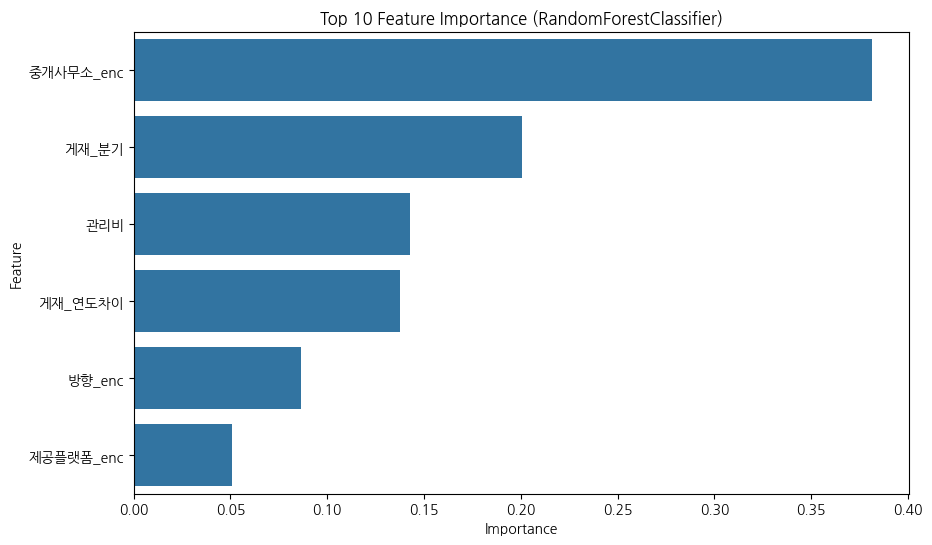

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:10])
plt.title('Top 10 Feature Importance (RandomForestClassifier)')
plt.show()

In [23]:
# test 데이터 예측
test_X = test

In [24]:
# 예측 수행
test_predictions = rf_model.predict(test_X)

In [25]:
# 결과 확인
print(test_predictions[:10])  # 상위 10개 출력

[0 0 0 0 0 0 0 0 0 0]


5. 제출파일 생성

In [32]:
print(len(test_predictions), len(sample_submission))

613 613


In [26]:
# 제출 파일 생성
sample_submission['허위매물여부'] = test_predictions

In [34]:
print(len(test_predictions), len(sample_submission))

613 613


In [35]:
sample_submission.head()

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [27]:
sample_submission.to_csv('250228_submission_rfmodel.csv', index=False, encoding='utf-8-sig')